# **TranPhan - Loan Default Prediction - Capstone Project -Apr2021**

# **Milestone 1**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for statistical analysis
import scipy.stats as stats

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
#Load the dataset 
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [4]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')
cols

['REASON', 'JOB', 'BAD']

In [5]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [6]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [7]:
# Analyze the summary statistics for numerical variables

num_cols=data.select_dtypes('number').columns
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**
- On average, amount of loan approved is USD 18,608.
- On average, amount due on the existing mortgage is USD 73,761.
- On average, current value of the property is USD 101,776
- There is a high difference between the 3rd quartile and the maximum values of above variables - LOAN, MORTDUE, VALUE - indicating that there might be outliers in these variables.
- On average, the borrower has a working experience (YOJ) of 9 years with 0.25 late payments (DEROG) and 0.45 number of delinquent credit lines (DELINQ). 
- On average, the age of the oldest credit line (CLAGE) is 15 years (180 months), number of recent credit inquires (NINQ) of 1.18 and number of existing credit lines (CLNO) is 21.3 indicating that most of the borrower has a long history of good credit, not having any loan/debt recently and being qualified to have many credit cards. 
- On average, the debt-to-income ratio (DEBTINC) is 33.78 percent indicating that borrowers are affordable for their monthly mortgage.

In [8]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights**
- There two values of varible BAD which are 1 and 0. 
- There are also 2 values of varibale REASON and 6 values of variable JOB. 
- There are missing values in variables REASON and JOB.

**Let's look at the unique values in all the categorical variables**

In [9]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


**Insights**
- The rate of loan defaulted is 20% in the dataset. 
- There are 68.82% loans are debt consolidation and 31.18% of home improvement.
- Among borrowers, 22.46% are professional Executive, 16.69% are Office workers, 13.5% are Managers and 42% are others. 

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [10]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [11]:
df_raw = data.copy()

# getting list of numerical columns
numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()

df = treat_outliers_all(df_raw,numerical_col)

In [12]:
#checking data after treating outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18051.895973,9252.565294,1100.000000,11100.000000,16300.000000,23300.000000,41600.000000
MORTDUE,5442.0,71566.093752,37203.654400,2063.000000,46276.000000,65019.000000,91488.000000,159306.000000
VALUE,5848.0,98538.057633,45070.800236,8000.000000,66075.500000,89235.500000,119824.250000,200447.375000
YOJ,5445.0,8.873159,7.430914,0.000000,3.000000,7.000000,13.000000,28.000000
DEROG,5252.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,5380.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLAGE,5652.0,178.635811,80.495471,0.000000,115.116702,173.466667,231.562278,406.230642
NINQ,5450.0,1.093394,1.372692,0.000000,0.000000,1.000000,2.000000,5.000000
CLNO,5738.0,21.032851,9.420239,0.000000,15.000000,20.000000,26.000000,42.500000
DEBTINC,4693.0,33.681973,7.135236,14.345367,29.140031,34.818262,39.003141,53.797805


#### Adding new columns in the dataset for each column which has missing values 

In [13]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [14]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [15]:
#Treat Missing Values in numerical columns with median and mode in categorical variables
#Select numeric columns
num_df = df.select_dtypes('number')

#Select string and object columns 
cat_df = df.select_dtypes('category').columns.tolist()

#Fill numeric columns with median
df[num_df.columns] = num_df.fillna(num_df.median())

#Fill categorical column with mode
for column in cat_df:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [16]:
#Checking data after treating missing values & outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
- Logistic Regression
- Decision Tree Classifier
- Tunned Decison Tree
- Random Forest Model
- Tunned Random Forest

**2. Overall solution design** - What is the potential solution design?
- Understanding the business problem
- Understanding the Data through Data Exploration.
- Preparing the data for model building
- Running each model and decide which model is the best
- Visualizing important features of the models.
- Conclusion and Recommendations
- Presentation and Feedback Receiving

**3. Measures of success** - What are the key measures of success?
- Classification report 
- Confusion matrix
- Recall need to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.

# **Milestone 2**

### **We have two dataset**
- data: the original dataset.
- df: the dataset after treating outliers and missing values from Milestone 1
- The dataset is now ready for the the Model Building

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [17]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = df.drop(columns=['BAD'])

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X,drop_first=True)

# Create y(dependent varibale)
Y = df['BAD']

### **Splitting the data into 80% train and 20% test set**

In [18]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [19]:
#Checking the shape of the train and the test dataset
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4768, 27)
Shape of Test set :  (1192, 27)
Percentage of classes in training set:
0    0.802643
1    0.197357
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [20]:
#creating metric function 
#function to print classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model 80:20** 

In [21]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the training data 
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3827
           1       0.65      0.02      0.04       941

    accuracy                           0.80      4768
   macro avg       0.73      0.51      0.47      4768
weighted avg       0.77      0.80      0.72      4768



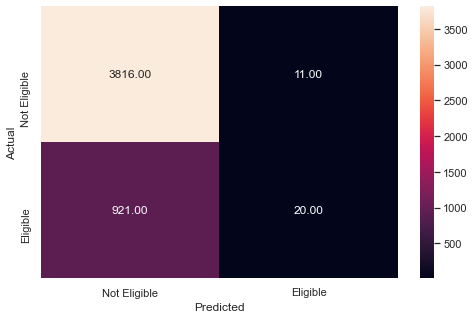

In [22]:
#Predict for train set
y_pred_train1 = log_reg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       944
           1       0.67      0.01      0.02       248

    accuracy                           0.79      1192
   macro avg       0.73      0.50      0.45      1192
weighted avg       0.77      0.79      0.70      1192



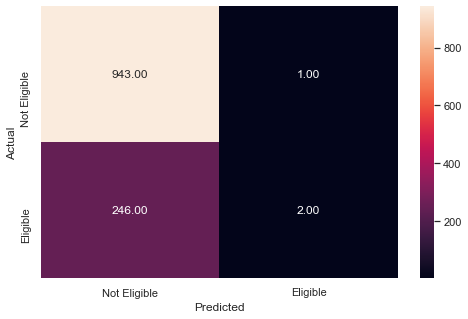

In [23]:
#Predict for test set
y_pred_test1 = log_reg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test1)

**Observations:**
- Dataset split 80:20 compared with dataset 70:30 
- Dataset 70:30 performs better on train dataset for Precision. But 80:20 performs better on test data set
- Recall score is the same for both.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [24]:
# Printing the coefficients of logistic regression

pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

DEBTINC                        1.979183e-02
CLNO                           7.806489e-03
NINQ                           4.333054e-03
DEBTINC_missing_values_flag    4.269233e-03
VALUE_missing_values_flag      6.757375e-04
REASON_HomeImp                 1.980654e-04
JOB_Self                       1.670889e-04
CLAGE_missing_values_flag      1.353465e-04
JOB_Sales                      1.327303e-04
JOB_Other                      1.206064e-04
CLNO_missing_values_flag       4.673926e-05
REASON_missing_values_flag     5.851658e-06
DEROG                          0.000000e+00
DELINQ                         0.000000e+00
VALUE                         -8.371755e-07
MORTDUE                       -5.272599e-06
LOAN                          -2.748566e-05
MORTDUE_missing_values_flag   -4.564786e-05
JOB_ProfExe                   -1.815834e-04
NINQ_missing_values_flag      -2.606731e-04
YOJ_missing_values_flag       -2.680986e-04
JOB_missing_values_flag       -3.199290e-04
DELINQ_missing_values_flag    -4

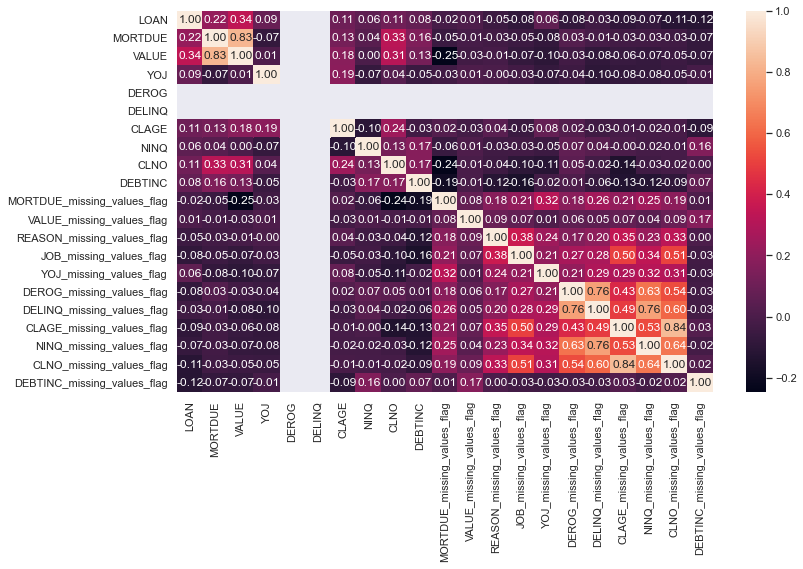

In [25]:
#Checking the heatmap of the dataset 
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Splitting the data into 70% train and 30% test set**

In [29]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

### **Build a Logistic Regression Model 70:30** 

In [30]:
# Defining the Logistic regression model
log_reg = LogisticRegression()

# Fitting the model on the training data 
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.69      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.75      0.51      0.47      4172
weighted avg       0.78      0.81      0.73      4172



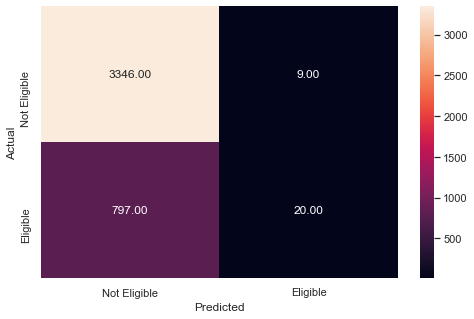

In [32]:
#Predict for train set
y_pred_train1 = log_reg.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.43      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.61      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



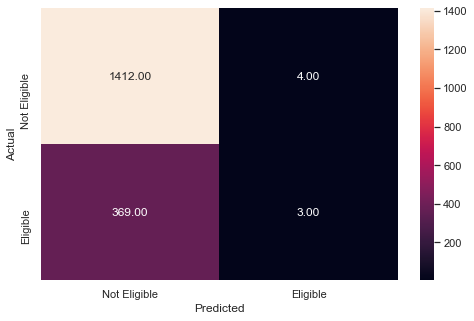

In [33]:
#Predict for test set
y_pred_test1 = log_reg.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, y_pred_test1)

### **Get optimal threshold for the Logistic Regression**

**Precision-Recall Curve for Logistic Regression**

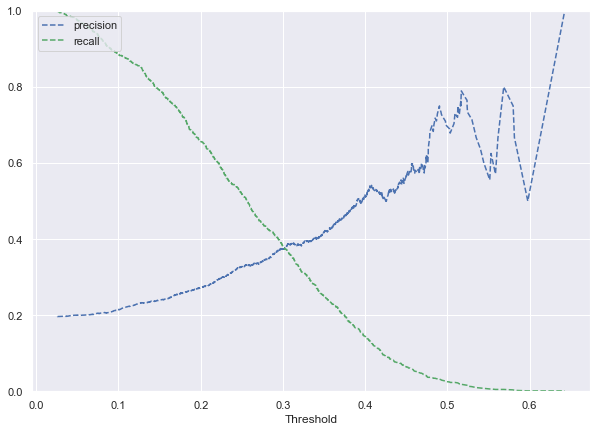

In [34]:
from sklearn.metrics import precision_recall_curve
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observations:**
- We can see that **precision and recall are balanced for the threshold of about 0.3.**
- Let's try to calculate the exact threshold where precision and recall are equal.

In [35]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.30200320527465785


- The threshold of 0.302 would give a balanced precision and recall.

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3355
           1       0.37      0.38      0.38       817

    accuracy                           0.75      4172
   macro avg       0.61      0.61      0.61      4172
weighted avg       0.76      0.75      0.76      4172



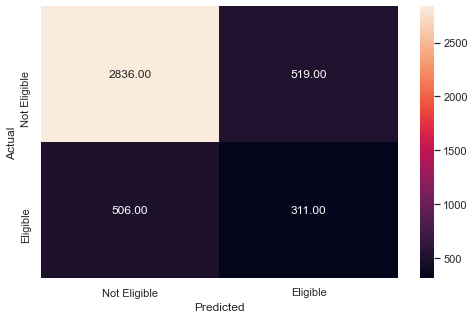

In [36]:
#Check performance of the model on the training dataset after changing the threshold
optimal_threshold1 = 0.3
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1416
           1       0.36      0.34      0.35       372

    accuracy                           0.74      1788
   macro avg       0.60      0.59      0.60      1788
weighted avg       0.73      0.74      0.74      1788



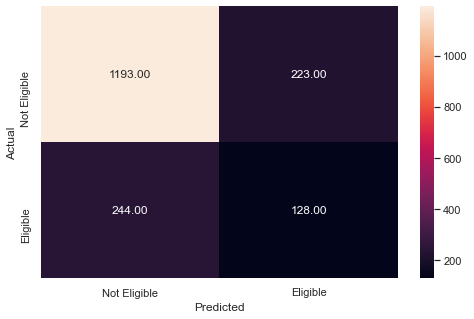

In [39]:
#Check performance of the model on the test dataset after changing the threshold
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:**
- We can see that the Logistic Model with threshold = 0.3 give better performance for both train and test dataset.

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers & missing values and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model and further models

In [40]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [41]:
# Add binary flags
# List of columns that has missing values in it
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)

In [42]:
#Treat Missing Values in numerical columns with median and mode in categorical variables
#Select numeric columns
num_data = data.select_dtypes('number')

#Select string and object columns 
cat_data = data.select_dtypes('category').columns.tolist()

#Fill numeric columns with median
data[num_data.columns] = num_data.fillna(num_data.median())

#Fill categorical column with mode
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [43]:
#Checking the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [44]:
# Analyze the summary statistics for numerical variables to check outliers
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5960.0,73001.041812,42552.726779,2063.000000,48139.000000,65019.000000,88200.250000,399550.000000
VALUE,5960.0,101540.387423,56869.436682,8000.000000,66489.500000,89235.500000,119004.750000,855909.000000
YOJ,5960.0,8.756166,7.259424,0.000000,3.000000,7.000000,12.000000,41.000000
DEROG,5960.0,0.224329,0.798458,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5960.0,0.405705,1.079256,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5960.0,179.440725,83.574697,0.000000,117.371430,173.466667,227.143058,1168.233561
NINQ,5960.0,1.170134,1.653866,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5960.0,21.247819,9.951308,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,5960.0,34.000651,7.644528,0.524499,30.763159,34.818262,37.949892,203.312149


**Insights**
- The dataset has been treated missing values, still kept with outliers.
- The dataset is ready for further models

#### Separating the target variable y and independent variable x

In [45]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
X = data.drop(columns='BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
y = data['BAD']

#### Split the data

In [47]:
# Split the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1) 

#### Decision Tree with class_weight = {0:0:3, 1:0.7}

In [48]:
#Defining Decision tree model with class_weight={0: 0.3, 1: 0.7}
d_tree= DecisionTreeClassifier(random_state=7, class_weight={0:0.3, 1:0.7})

In [49]:
#fitting Decision tree model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



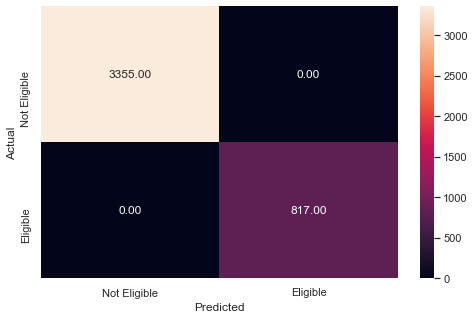

In [50]:
# Checking performance on the training data
y_pred_train2 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.69      0.63      0.66       372

    accuracy                           0.86      1788
   macro avg       0.80      0.78      0.79      1788
weighted avg       0.86      0.86      0.86      1788



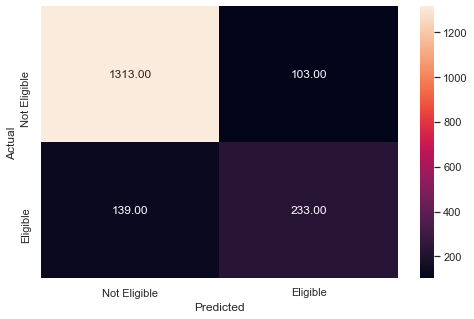

In [51]:
# Checking performance on the testing data
y_pred_test2 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Insights:**
- The Decision Tree with class_weight={0: 0.3, 1: 0.7} gives better performance than Decision Tree class_weight={0: 0.2, 1: 0.8}

#### Decision Tree with class_weight = {0:0:1, 1:0.9}

In [52]:
#Defining Decision tree model with class_weight={0: 0.1, 1: 0.9}
d_tree2= DecisionTreeClassifier(random_state=7, class_weight={0:0.1, 1:0.9})

In [53]:
#fitting Decision tree model
d_tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



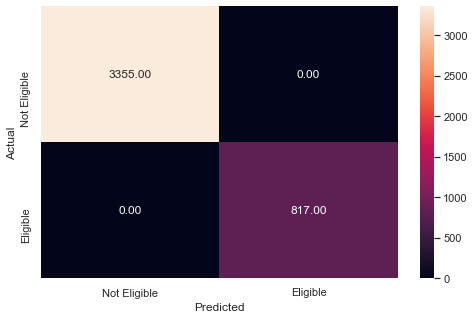

In [54]:
# Checking performance on the training data
y_pred_train21 = d_tree2.predict(X_train)
metrics_score(y_train, y_pred_train21)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.60      0.65       372

    accuracy                           0.86      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



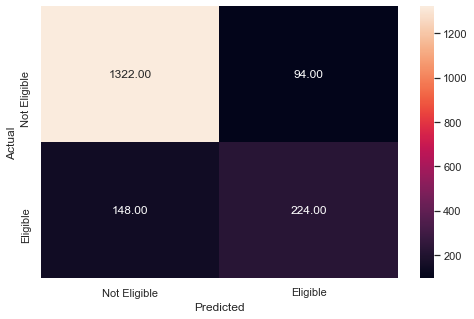

In [55]:
# Checking performance on the testing data
y_pred_test21 = d_tree2.predict(X_test)
metrics_score(y_test, y_pred_test21)

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model
We will use the class_weight hyperparameter with value equal to {0:0.2, 1:0.8} which is approximately the opposite of the imbalance in the original data

In [56]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0:0.2, 1:0.8})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_samples_leaf=25, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3355
           1       0.64      0.85      0.73       817

    accuracy                           0.87      4172
   macro avg       0.80      0.86      0.82      4172
weighted avg       0.90      0.87      0.88      4172



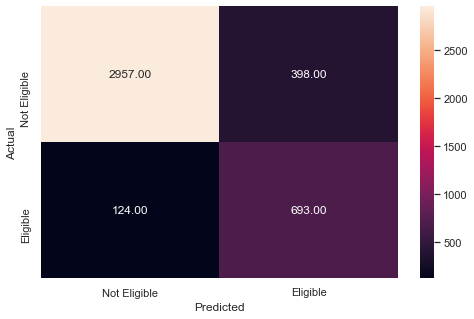

In [57]:
# Checking performance on the training data based on the tuned model
y_pred_train3 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1416
           1       0.61      0.76      0.68       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.87      0.85      0.86      1788



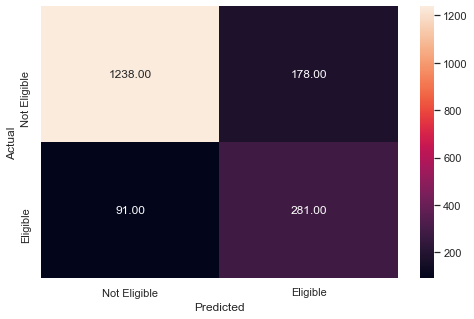

In [58]:
# Checking performance on the testing data based on the tuned model
y_pred_test3 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Insights:**
- The Decision Tree tunned model is not over-fitting on the training dataset and giving a better performance on the previous model.
- Compared with the previous model, on the test dataset, Recall score has gone up from  0.61 to 0.76 which means the tunned model gives a higher chance of minimizing False Negatives. 

#### Plotting the Tunned Decision Tree

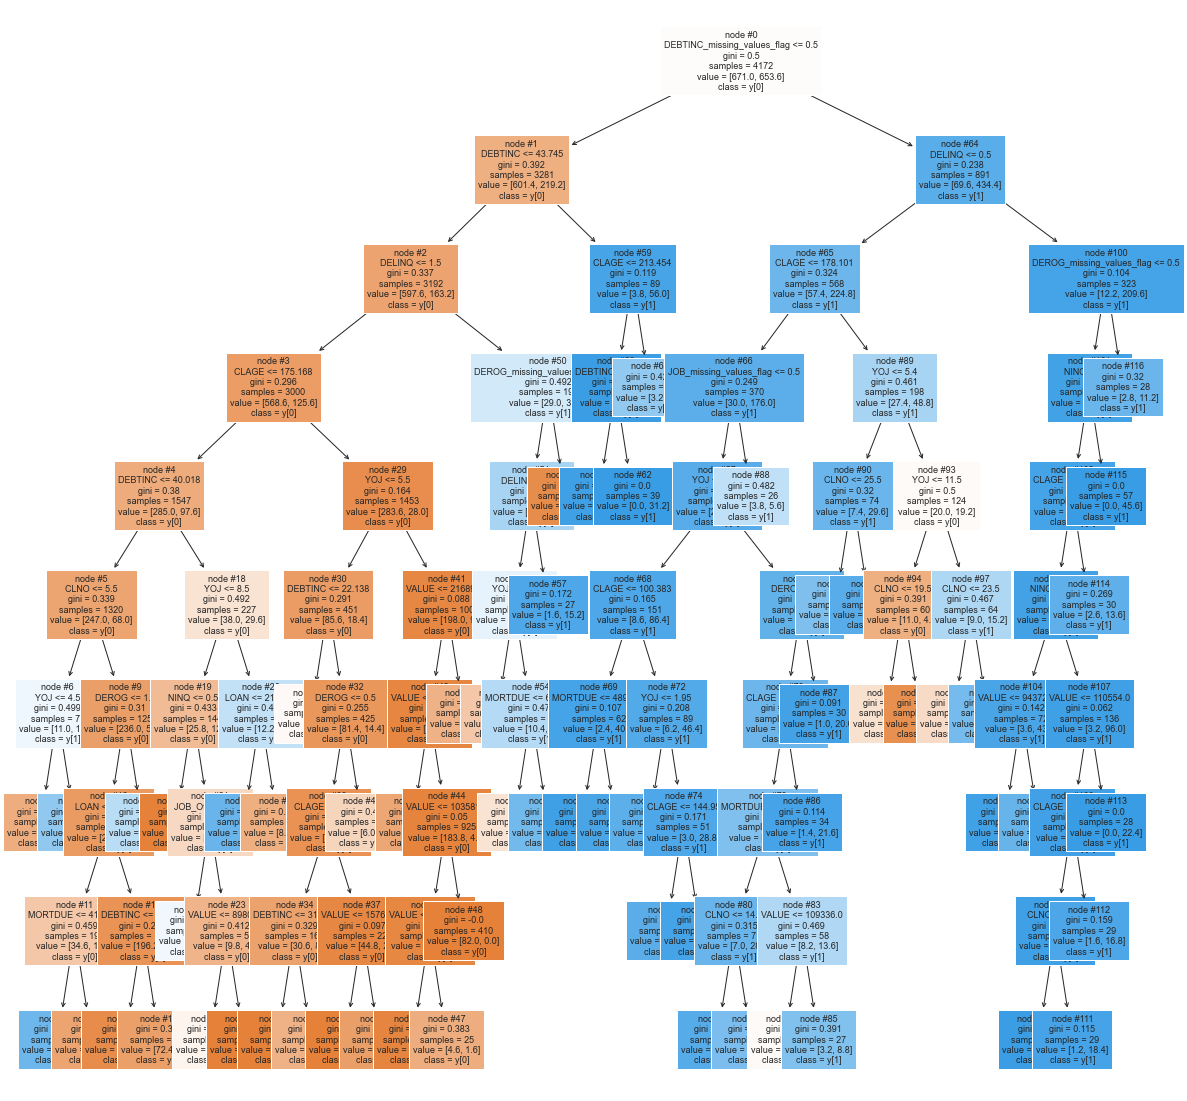

In [59]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize=(20,20))

tree.plot_tree(d_tree_tuned,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [60]:
# Importance of features in the tree building
print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
DEBTINC_missing_values_flag  0.555675
DEBTINC                      0.169998
DELINQ                       0.067058
CLAGE                        0.048135
YOJ                          0.037709
MORTDUE                      0.022646
LOAN                         0.022047
CLNO                         0.018759
DEROG                        0.017539
VALUE                        0.014793
DEROG_missing_values_flag    0.013830
NINQ                         0.006565
JOB_missing_values_flag      0.003314
JOB_Other                    0.001931
REASON_missing_values_flag   0.000000
YOJ_missing_values_flag      0.000000
VALUE_missing_values_flag    0.000000
DELINQ_missing_values_flag   0.000000
CLAGE_missing_values_flag    0.000000
NINQ_missing_values_flag     0.000000
CLNO_missing_values_flag     0.000000
MORTDUE_missing_values_flag  0.000000
REASON_HomeImp               0.000000
JOB_Office                   0.000000
JOB_ProfExe                  0.000000
JOB_Sales   

#### Deduce the business rules apparent from the Decision Tress and write them down:
- The clients who first have **DEBTINC_missing_values_flag more than 0.5** will automatically identified as Loan Default. This means that Loan applicants who do not provide information about Debt_to_Income ratio will not be qualified for the Loan approval. 
- The Clients who have **Debt_to_Income ratio more than 43.74 (percent)** no matter how good other situations such as good credit history, high value of property, are identified as Loan Defaulted.
- The clients who **first have number of delinquent credit lines (DELINQ) less than 0.5** are likely to being defaulted. These clients are having bad record of being late payment and increase the risk for the bank if they give them loan.  
- The clients who have **Debt_to_Income less than 43.74** and have **age of the oldest credit lines (CLAGE) no more than 17 years (213.45 months)** will be likely a Loan Defaulted.
- From those clients who already have **late payment record (DELINQ less than or equal to 0.5)** but having **long history of credit lines of 15 years** (CLAGE less than or equal to 178) and **number of years at present job (YOJ) in the range (5.4, 11.5)** will be likely **to be approved for the Loan**. This means the client is having a long-time stable Income for monthly mortgage.


### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

## K-Nearest Neighbors (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# let us now scale the features

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [63]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

### Using GridSearchCV for find the value of K and hyperparameter tuning

In [64]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2,20,2), 'weights':['uniform','distance'], 'p':[1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='f1', cv=10)

model_knn=grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')


In [65]:
#Fit the KNN model on the scaled training data
knn_estimator.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



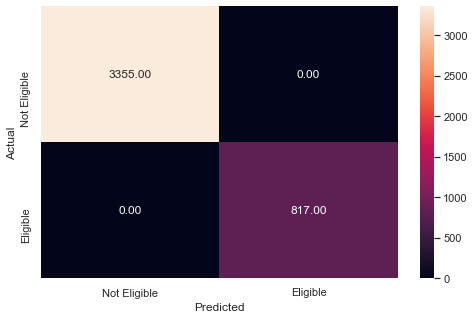

In [66]:
#Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train4 = knn_estimator.predict(X_train_scaled)
metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1416
           1       0.93      0.73      0.82       372

    accuracy                           0.93      1788
   macro avg       0.93      0.86      0.89      1788
weighted avg       0.93      0.93      0.93      1788



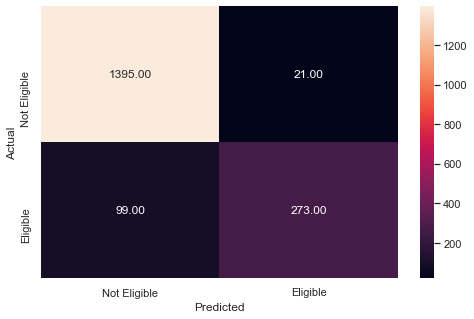

In [67]:
#Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test4 = knn_estimator.predict(X_test_scaled)
metrics_score(y_test, y_pred_test4)

In [70]:
# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k 

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()


for k in range(1,16):
  train_error = []
  test_error = []
  lista = []
  knn = KNeighborsClassifier(n_neighbors=k)
  print(k)
  for i in range(100):
    #let us scale the data. Notice the scaling done here.
    X_train_scaled = ss.fit_transform(X_train_scaled)
    X_test_scaled = ss.transform(X_test_scaled)
    knn.fit(X_train_scaled, y_train)
    train_error.append(1 - knn.score(X_train_scaled, y_train)) 
    test_error.append(1 - knn.score(X_test_scaled, y_test))
  lista.append(sum(train_error)/len(train_error))
  lista.append(sum(test_error)/len(test_error))
  knn_many_split[k] = lista
  print(knn_many_split[k])


knn_many_split

1
[0.0, 0.08892617449664439]
2
[0.06184084372003824, 0.11689038031319926]
3
[0.05512943432406528, 0.09675615212527973]
4
[0.08053691275167797, 0.11297539149888164]
5
[0.0707094918504314, 0.10178970917225948]
6
[0.08700862895493776, 0.1180089485458614]
7
[0.07909875359539777, 0.109619686800895]
8
[0.09419942473633752, 0.11577181208053672]
9
[0.09132310642377744, 0.110738255033557]
10
[0.10019175455417079, 0.11912751677852342]
11
[0.09611697027804417, 0.1152125279642055]
12
[0.10354745925215708, 0.12304250559284093]
13
[0.09851390220517742, 0.11744966442953048]
14
[0.10546500479386373, 0.12360178970917213]
15
[0.10426653883029698, 0.12248322147651024]


{1: [0.0, 0.08892617449664439],
 2: [0.06184084372003824, 0.11689038031319926],
 3: [0.05512943432406528, 0.09675615212527973],
 4: [0.08053691275167797, 0.11297539149888164],
 5: [0.0707094918504314, 0.10178970917225948],
 6: [0.08700862895493776, 0.1180089485458614],
 7: [0.07909875359539777, 0.109619686800895],
 8: [0.09419942473633752, 0.11577181208053672],
 9: [0.09132310642377744, 0.110738255033557],
 10: [0.10019175455417079, 0.11912751677852342],
 11: [0.09611697027804417, 0.1152125279642055],
 12: [0.10354745925215708, 0.12304250559284093],
 13: [0.09851390220517742, 0.11744966442953048],
 14: [0.10546500479386373, 0.12360178970917213],
 15: [0.10426653883029698, 0.12248322147651024]}

In [71]:
# Extracting k, the train and the test error in a list for easy plotting

kl = []
vl = []
v2 = []
for k, v in knn_many_split.items():
    kl.append(k)
    vl.append(knn_many_split[k][1])
    v2.append(knn_many_split[k][0])

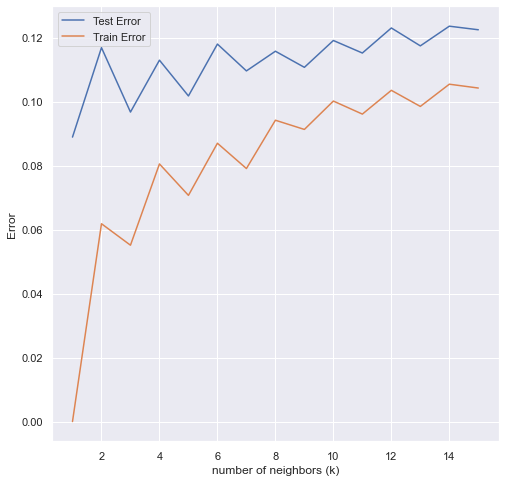

In [72]:
# Plotting k vs train and test error
plt.figure(figsize=(8,8))
plt.xlabel("number of neighbors (k)")
plt.ylabel("Error")
plt.plot(kl,vl, label = 'Test Error')
plt.plot(kl, v2, label = 'Train Error')
plt.legend()
plt.show()

**Insights:**
- The dataset still has outliers and multi-correlation.
_ Need to solve these 2 problems, then run the KNN model again

### **Comparing Model Performances**

In [89]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [90]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [91]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [92]:
# Make the list of all the model names 
models = [log_reg, d_tree, d_tree_tuned, rf_estimator, rf_estimator_weight, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [93]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':[log_reg, d_tree, d_tree_tuned, rf_estimator, rf_estimator_weight, rf_estimator_tuned], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(),0.807526,0.791387,0.028152,0.008065,0.718750,0.428571
1,"DecisionTreeClassifier(class_weight={0: 0.2, 1...",1.000000,0.866331,1.000000,0.607527,1.000000,0.708464
2,"DecisionTreeClassifier(class_weight={0: 0.2, 1...",0.874880,0.849553,0.848225,0.755376,0.635197,0.612200
3,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.911074,1.000000,0.693548,1.000000,0.851485
4,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.911074,1.000000,0.682796,1.000000,0.861017
5,"(DecisionTreeClassifier(criterion='entropy', m...",0.883030,0.869687,0.791922,0.744624,0.670466,0.667470


**Insights:**
- From the Model Performance Comparason above, we can see that the best two models giving highest Recall Score is tunned Decision Tree (model 3) and tunned Random Forest (model 6). However, the tunned Decision Tree is over-fitting on the Training Dataset. At each node, decision trees will make the decision after computing all attributes, and the path from the first node to a leaf represents **decision rules**. The deeper the tree, the more complex these rules will be. 
- The tunned Random Forest model has solved the over-fitting from the Decision Trees and give the better performance with optimal parameters. 
- Logistic Regresion is not working on this dataset. There are many reason for this including: high correlation between predictors and treating outliers. The model worked on the dataset which has been treated the missing values and outliers. This cause lost information of two variables (DEROG and DELINQ), influencing the performance of the model.

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?
- **The important features of clients to consider while approving a loan**:
    - Debt-to-income-missing-value-flag, Debt-to-income ratio (DEBTINC), number of delinquent credit lines (DELINQ), age of the oldest credit line in months (CLAGE), years at present job (YOJ).
    - Other less important feature: the amount due on the existing mortgage (MORTDUE), amount of loan approved (LOAN), number of existing credit lines (CLNO), number of major derogatory reports (DEROG), current value of the property (VALUE), DEROG-missing-value-flag, number of recent credit inquiries (NINQ), JOB-missing-values-flag. 
- **Profile of the clients who are likely to being defaulted**: 
    - Clients who do not provide information about Debt-to-Income ratio or number of major derogatory reports (DEROG).
    - Clients with high Debt-to-Income ratio more than 43.74%. This client increase the risk of unaffordability for monthly mortgage payment. 
    - Clients occurring history of delinquent credit (DELINQ). Despite they are having a good balanced Debt-to-income ratio, holding many credit lines (CLNO) and high current value of the property (VALUE).
    - However, clients with history of delinquent credit (DELINQ) could be qualified for a loan if they are having a history of credit lines more than 15 years (CLAGE) and number of years at present job (YOJ) more than 5. These are clients with a long-term permanent job providing a stable Income.

    
- **Recommendations to the bank on the important features**:
    - The data models work with clients’ history data. This allows the bank to determine pattern of behavior could lead to a future inability to make repayments of clients. The bank can proactively to assess the clients’ situation changes such as job changes/loss, income shortage, higher expenditures, history of delinquent credit, new loans, changes in household, changes in the social environment… 
    - Regular assessment of client credibility will help the bank detect potential risks, minimize the risks and avoid profit losses. 

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
- Different techniques: 
    - Logistics Regression: 
        - With the dataset after treating outliers and missing values
        - Model 1: Logistic Regression model was built on the threshold of 0.5 
    - Decision Trees: 
        - With the dataset after treating missing values and keeping the outliers.
        - Model 2: Based Decision Tree model with class weight = {0:0.2, 1:0.8}
        - Model 3: Decision Tree with hyper-parameters tunning using Grid Search CV
    - Random Forest:
        - With the dataset after treating missing values and keeping the outliers.
        - Model 4: Based model Random Forest
        - Model 5: Random Forest Model with Class Weights {0: 0.2, 1: 0.8}
        - Model 6: Random Forest with hyper-parameters tunning using Grid Search CV

- Compare the performance of different techniques:
    - Decision Tree with tunned hyper-parameters gives the highest Recall Score with 0.85 and 0.756 on the train and test set respectively. However, the model is over fitting on the training dataset. 
    - The Random Forest model with tunned hyper-parameters also gives the very high Recall Score of 0.79 and 0.74 on the train and test set. This model also solved the over-fitting problems from the Tunned Decision Tree but it’s less interpretable. 

- Is scope to improve the performance further?
    - We should eliminate the high correlation between independent predictor to get better performance on Decision Tree models.
    - We can try:  an optimal threshold in The Logistic Regression, or a different class-weight to see if we can have a better performance. 

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?
- Model proposed to be adopted?
    - Based on the comparison, the best model for the problem is Random Forest with tunned hyper-parameter which gives a more diverse and better generalization. 
    - There is a tradeoff between model performance and interpretability as this model do not explain the importance of each factors on the target variable. Choosing this model with higher Recall score because it is very important for the bank to predict the defaulted client.
    - Debt-to-income-missing-value-flag, Debt-to-income ratio (DEBTINC), number of delinquent credit lines (DELINQ), age of the oldest credit line in months (CLAGE), years at present job (YOJ) are the most important features to predict a Loan Defaulted. 


- Why is this the best solution to adopt?
    - Reason for choosing the best model:
        - Having a high Recall Score of 0.74 compared with other models.
        - Fixed the problem of Over-fitting in Decision Trees.
        - Not sensitive of outliers
    - How that solves the problem?
        - The bank need to focus to build gather and analyze all the information related to those mentioned features which will be applied to the chosen model to detect a client would be a defaulted or not. This will prevent the bank from profit loss. 